In [18]:
import tensorflow as tf
from sklearn.datasets import load_diabetes, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.utils import Bunch
import matplotlib.pyplot as plt

In [19]:
def load_sonar():
    from urllib.request import urlretrieve
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"
    urlretrieve(url, "sonar.csv")
    data = np.genfromtxt("sonar.csv", delimiter=",")
    X = data[:, :-1]
    y = (data[:, -1] == "R").astype(int)
    return Bunch(data=X, target=y)

In [20]:
def train_evaluate(X, y, dataset_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    # Train with history and validation split
    history = model.fit(X_train, y_train, 
                       epochs=100, 
                       batch_size=32, 
                       validation_split=0.2,
                       verbose=1)
    
    # Plot accuracy
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{dataset_name} Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')
    
    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{dataset_name} Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    
    plt.tight_layout()
    plt.show()
    
    # Final evaluation
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"{dataset_name} final test accuracy: {accuracy:.4f}")


Training on Diabetes dataset:
Epoch 1/100


C:\Users\vikas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5044 - loss: 0.6994 - val_accuracy: 0.4930 - val_loss: 0.6857
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5163 - loss: 0.6874 - val_accuracy: 0.5352 - val_loss: 0.6738
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5722 - loss: 0.6728 - val_accuracy: 0.5634 - val_loss: 0.6628
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6183 - loss: 0.6662 - val_accuracy: 0.5775 - val_loss: 0.6520
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6402 - loss: 0.6549 - val_accuracy: 0.6056 - val_loss: 0.6404
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6682 - loss: 0.6460 - val_accuracy: 0.7183 - val_loss: 0.6275
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6953 - loss: 0.6240 - val_accuracy: 0.7887 - val_loss: 0.6138
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7207 - loss: 0.6012 - val_accuracy: 0.7746 - val_loss: 0.6000
Epoch 9/1

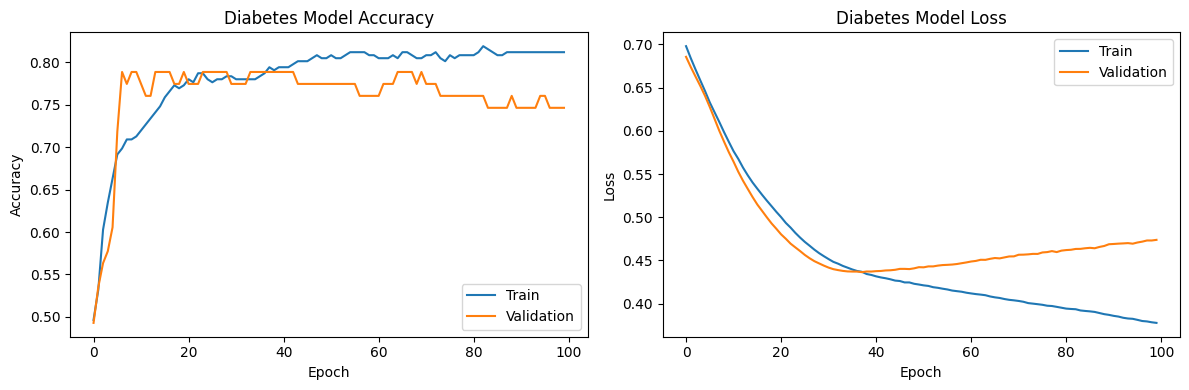

Diabetes final test accuracy: 0.6629

Training on Cancer dataset:
Epoch 1/100


C:\Users\vikas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6574 - loss: 0.5525 - val_accuracy: 0.8022 - val_loss: 0.5346
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8279 - loss: 0.4474 - val_accuracy: 0.8681 - val_loss: 0.4828
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8796 - loss: 0.4180 - val_accuracy: 0.9011 - val_loss: 0.4434
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9388 - loss: 0.3803 - val_accuracy: 0.9341 - val_loss: 0.4062
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9473 - loss: 0.3420 - val_accuracy: 0.9451 - val_loss: 0.3707
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9710 - loss: 0.2806 - val_accuracy: 0.9451 - val_loss: 0.3361
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9720 - loss: 0.2638 - val_accuracy: 0.9560 - val_loss: 0.3034
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9778 - loss: 0.2323 - val_accuracy: 0.9560 - val_loss: 0.

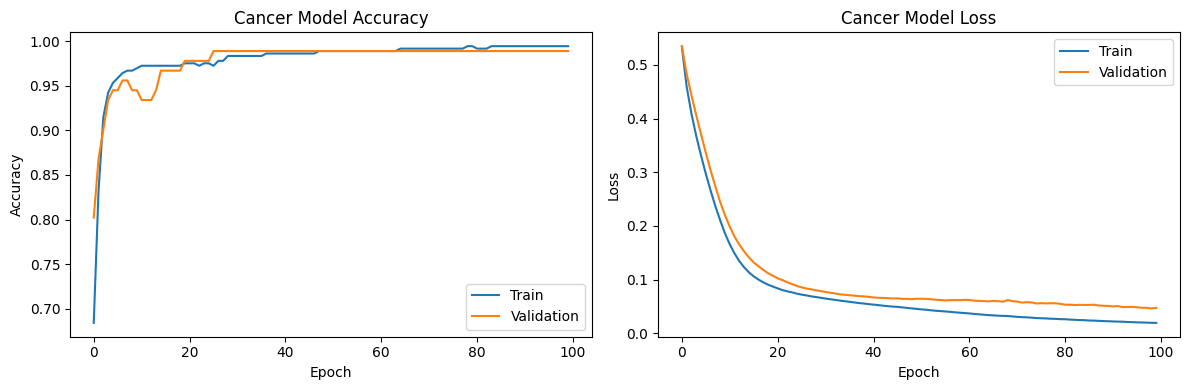

Cancer final test accuracy: 0.9825

Training on Sonar dataset:
Epoch 1/100


C:\Users\vikas\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.6696 - loss: 0.5957 - val_accuracy: 0.6765 - val_loss: 0.6260
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8007 - loss: 0.5478 - val_accuracy: 0.7059 - val_loss: 0.5743
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8749 - loss: 0.5159 - val_accuracy: 0.8235 - val_loss: 0.5267
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9687 - loss: 0.4651 - val_accuracy: 0.9706 - val_loss: 0.4838
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9850 - loss: 0.4424 - val_accuracy: 0.9706 - val_loss: 0.4441
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9944 - loss: 0.4134 - val_accuracy: 1.0000 - val_loss: 0.4041
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.3698 - val_accuracy: 1.0000 - val_loss: 0.3637
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.3299 - val_accuracy: 1.0000 - val_loss: 0.3252
Epoc

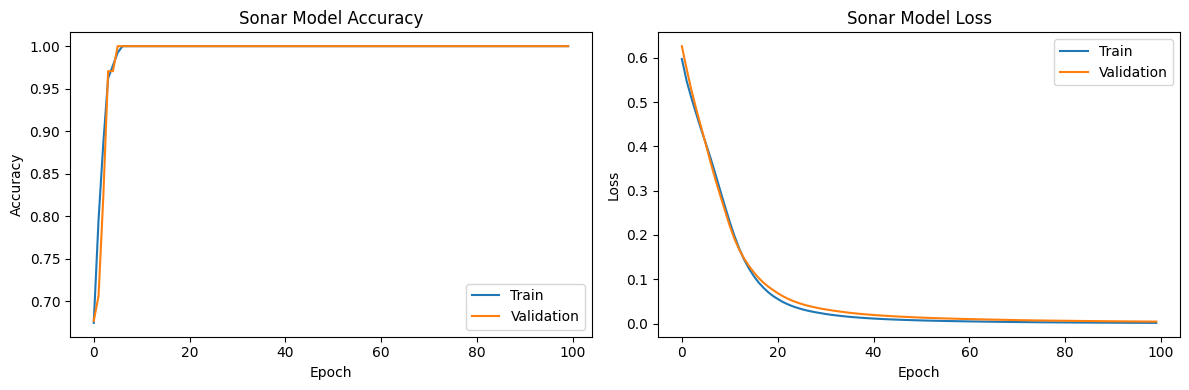

Sonar final test accuracy: 1.0000


In [21]:
datasets = {
    "Diabetes": load_diabetes(),
    "Cancer": load_breast_cancer(),
    "Sonar": load_sonar()
}

for name, dataset in datasets.items():
    X, y = dataset.data, dataset.target
    if name == "Diabetes":
        y = (y > y.mean()).astype(int)
    print(f"\nTraining on {name} dataset:")
    train_evaluate(X, y, name)